In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True) #dropping na values
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response

In [3]:
df = pd.read_csv("BhartiAirtel.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
2581,2011-01-03,358.40,364.90,354.50,359.35,360.257123,316463,5263,114008050.0,82793.0,26.16,10.40,0.95
2580,2011-01-04,361.00,361.75,353.10,355.30,359.347771,510966,3163,183614493.0,364759.0,71.39,8.65,-5.70
2579,2011-01-05,353.90,355.70,348.35,349.90,351.481252,172421,2552,60602749.0,43428.0,25.19,7.35,-4.00
2578,2011-01-06,351.00,355.35,351.00,353.25,353.230604,196241,2516,69318327.0,41231.0,21.01,4.35,2.25
2577,2011-01-07,353.90,354.75,335.00,338.70,342.594042,358515,5778,122825103.0,73576.0,20.52,19.75,-15.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-05-31,525.80,535.80,525.40,534.95,532.479380,927325,19141,493781441.0,549560.0,59.26,10.40,9.15
3,2021-06-01,538.00,538.00,530.15,532.90,533.446883,501024,12404,267269691.0,232077.0,46.32,7.85,-5.10
2,2021-06-02,530.10,534.50,528.00,529.60,530.544324,494007,11723,262092610.0,273203.0,55.30,6.50,-0.50
1,2021-06-03,531.85,533.35,528.70,532.10,531.013092,735782,15452,390709875.0,479872.0,65.22,4.65,0.25


In [4]:
forecast_col = 'Close Price'
forecast_out = 5
test_size = 0.2

In [5]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train) #training the linear regression model

LinearRegression()

In [6]:
score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.9506536002689049, 'forecast_set': array([531.67060568, 529.66462612, 526.4354883 , 528.88180483,
       529.4689208 ])}


In [7]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [11]:
import matplotlib.pyplot as plt


data = pd.read_csv("BhartiAirtel.csv")
data.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,4-June-2021,534.80,535.75,531.25,532.70,533.229306,661985,12196,352989802.0,398176.0,60.15,4.50,-2.10
1,3-June-2021,531.85,533.35,528.70,532.10,531.013092,735782,15452,390709875.0,479872.0,65.22,4.65,0.25
2,2-June-2021,530.10,534.50,528.00,529.60,530.544324,494007,11723,262092610.0,273203.0,55.30,6.50,-0.50
3,1-June-2021,538.00,538.00,530.15,532.90,533.446883,501024,12404,267269691.0,232077.0,46.32,7.85,-5.10
4,31-May-2021,525.80,535.80,525.40,534.95,532.479380,927325,19141,493781441.0,549560.0,59.26,10.40,9.15


In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data_sort = data.sort_values('Date')
data_sort 


,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
2581,2011-01-03,358.40,364.90,354.50,359.35,360.257123,316463,5263,114008050.0,82793.0,26.16,10.40,0.95
2580,2011-01-04,361.00,361.75,353.10,355.30,359.347771,510966,3163,183614493.0,364759.0,71.39,8.65,-5.70
2579,2011-01-05,353.90,355.70,348.35,349.90,351.481252,172421,2552,60602749.0,43428.0,25.19,7.35,-4.00
2578,2011-01-06,351.00,355.35,351.00,353.25,353.230604,196241,2516,69318327.0,41231.0,21.01,4.35,2.25
2577,2011-01-07,353.90,354.75,335.00,338.70,342.594042,358515,5778,122825103.0,73576.0,20.52,19.75,-15.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-05-31,525.80,535.80,525.40,534.95,532.479380,927325,19141,493781441.0,549560.0,59.26,10.40,9.15
3,2021-06-01,538.00,538.00,530.15,532.90,533.446883,501024,12404,267269691.0,232077.0,46.32,7.85,-5.10
2,2021-06-02,530.10,534.50,528.00,529.60,530.544324,494007,11723,262092610.0,273203.0,55.30,6.50,-0.50
1,2021-06-03,531.85,533.35,528.70,532.10,531.013092,735782,15452,390709875.0,479872.0,65.22,4.65,0.25


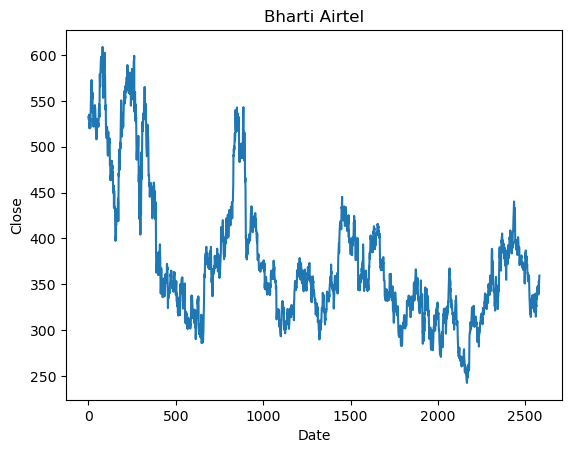

In [13]:
close = data_sort['Close Price']
ax = close.plot(title='Bharti Airtel')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [14]:
data_sort["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data_sort = data_sort[["Date", "Close Price"]]

/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_32902/1199540506.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_sort["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)


In [15]:
data_sort = data_sort.rename(columns={"Date" : "ds", "Close Price" : "y" })

In [16]:
data_sort

,ds,y
2581,2011-01-03,359.35
2580,2011-01-04,355.30
2579,2011-01-05,349.90
2578,2011-01-06,353.25
2577,2011-01-07,338.70
...,...,...
4,2021-05-31,534.95
3,2021-06-01,532.90
2,2021-06-02,529.60
1,2021-06-03,532.10
